<a href="https://colab.research.google.com/github/IlianKukov/Advanced-Machine-Learning-and-AI/blob/main/atiml23_lec10_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## k mean clusterring


Machine-learning models fall into two broad categories: supervised-learning models and unsupervised-learning models. The purpose of supervised learning is to make predictions. The purpose of unsupervised learning is to glean insights from existing data. One example of unsupervised learning is examining data regarding products purchased from your company and the customers who purchased them to determine which customers might be most interested in a new product. Another example is analyzing a collection of documents and grouping them by similarity. Imagine an automated system that examines support tickets and assigns each of them priority 1, 2, or 3. That’s precisely the kind of task unsupervised learning can accomplish.

One of the benefits of unsupervised learning is that it doesn’t require labeled data. Suppose you want to use machine learning to build the world’s best spam filter. You need a dataset containing millions of e-mails, and each e-mail in the dataset must be labeled with a 0 for non-spam or 1 for spam. Somebody has to do the labeling, and labeling millions of rows of anything with 1s and 0s is both tedious and time-consuming. There are public e-mail datasets for which this has already been done, but in the general case in which you are using machine learning to solve a domain-specific problem, expect to spend the bulk of your time not training a model, but labeling the data that the model will be trained with.

A spam filter is a supervised-learning model. It requires labeled data. Unsupervised learning doesn’t require labeled data. The data may require other preparation – for example, you might have to remove rows with missing values or dedupe the dataset to eliminate redundancies – but it doesn’t have to be labeled.

Most unsupervised learning uses a technique called clustering. The purpose of clustering is to group data by attributes. And the most popular clustering algorithm is k-means clustering, which takes n data samples and groups them into m clusters, where m is a number you specify. Grouping is performed using an iterative process that computes a centroid for each cluster and assigns samples to clusters based on their proximity to the cluster centroids. If the distance from a particular sample to the centroid of cluster 1 is 2.0 and the distance from the same sample to the center of cluster 2 is 3.0, then the sample is assigned to cluster 1. In the example below, 200 samples are loosely arranged in three clusters. The diagram on the left shows the raw, ungrouped samples. The diagram on the right shows the cluster centroids (the red dots) with the samples colored by cluster.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
sns.set()
%matplotlib inline

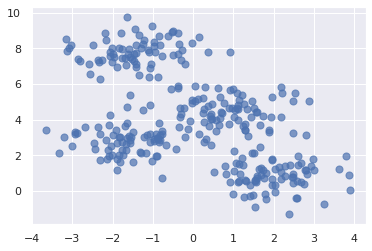

In [ ]:
points, cluster_indexes = make_blobs(n_samples=300, centers=4, cluster_std=0.8, random_state=0)
 
x = points[:, 0]
y = points[:, 1]
 
plt.scatter(x, y, s=50, alpha=0.7)

Cluster analysis seeks to partition the input data into groups of closely related instances so that instances that belong to the same cluster are more similar to each other than to instances that belong to other clusters. In this tutorial, we will provide examples of using different clustering techniques provided by the scikit-learn library package.


K-means Clustering

The k-means clustering algorithm represents each cluster by its corresponding cluster centroid. The algorithm would partition the input data into k disjoint clusters by iteratively applying the following two steps:

    Form k clusters by assigning each instance to its nearest centroid.
    Recompute the centroid of each cluster.

In this section, we perform k-means clustering on a toy example of movie ratings dataset. We first create the dataset as follows.

In [ ]:
import pandas as pd

ratings = [['john',5,5,2,1],['mary',4,5,3,2],['bob',4,4,4,3],['lisa',2,2,4,5],['lee',1,2,3,4],['harry',2,1,5,5]]
titles = ['user','Jaws','Star Wars','Exorcist','Omen']
movies = pd.DataFrame(ratings,columns=titles)
movies


,user,Jaws,Star Wars,Exorcist,Omen
0,john,5,5,2,1
1,mary,4,5,3,2
2,bob,4,4,4,3
3,lisa,2,2,4,5
4,lee,1,2,3,4
5,harry,2,1,5,5




In this example dataset, the first 3 users liked action movies (Jaws and Star Wars) while the last 3 users enjoyed horror movies (Exorcist and Omen). Our goal is to apply k-means clustering on the users to identify groups of users with similar movie preferences.

The example below shows how to apply k-means clustering (with k=2) on the movie ratings data. We must remove the "user" column first before applying the clustering algorithm. The cluster assignment for each user is displayed as a dataframe object.


Next, use k-means clustering to divide the coordinate pairs into four groups. Then render the cluster centroids in red and color-code the data points by cluster. Scikit’s KMeans class does the heavy lifting, and once it’s fit to the coordinate pairs, you can get the locations of the centroids from KMeans’ cluster_centers_ attribute:

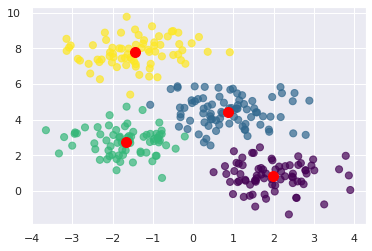

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(points)
predicted_cluster_indexes = kmeans.predict(points)
 
plt.scatter(x, y, c=predicted_cluster_indexes, s=50, alpha=0.7, cmap='viridis')
 
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100)

Text(0, 0.5, 'Inertia')

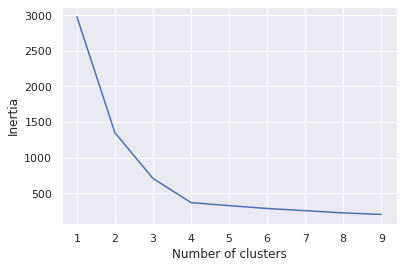

In [ ]:
inertias = []
 
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(points)
    inertias.append(kmeans.inertia_)
 
plt.plot(range(1, 10), inertias)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

Segment Customers on Two Attributes

Let’s use k-means clustering to tackle a real problem: segmenting customers to identify ones to target with a promotion to increase their purchasing activity. The dataset that we’ll use is a sample customer-segmentation dataset named customers.csv. Start by creating a subdirectory named “Data” in the folder where your notebook resides, copying customers.csv into the “Data” subdirectory, loading the dataset into a Pandas DataFrame, and displaying the first five rows:

In [ ]:
import pandas as pd
 
customers = pd.read_csv('./customers.csv')
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Text(0, 0.5, 'Spending Score')

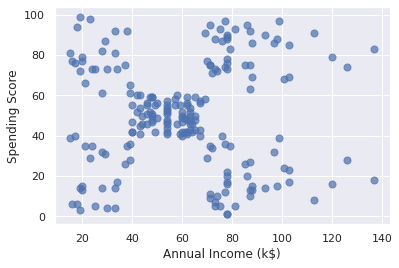

In [ ]:
points = customers.iloc[:, 3:5].values
x = points[:, 0]
y = points[:, 1]
 
plt.scatter(x, y, s=50, alpha=0.7)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')

Use the following code to segment the customers into five clusters and highlight the clusters:

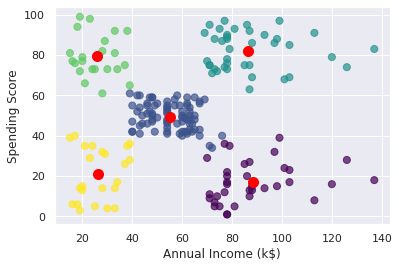

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(points)
predicted_cluster_indexes = kmeans.predict(points)
 
plt.scatter(x, y, c=predicted_cluster_indexes, s=50, alpha=0.7, cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
 
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100)

The customers in the lower-right quadrant of the chart might be good ones to target with a promotion to increase their spending. Why? Because they have high incomes but low spending scores. Use the following code to output the IDs of those customers:

Segment Customers on Many Attributes

The previous example was an easy one because you used just two variables: annual incomes and spending scores. You could have done the same without help from machine learning. But now let’s segment the customers again, this time using everything except the customer IDs. Start by replacing the strings “Male” and “Female” in the “Gender” column with 1s and 0s, a process known as label encoding. This is necessary because machine learning can only deal with numerical data.

In [ ]:
from sklearn.preprocessing import LabelEncoder
 
df = customers.copy()
encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


Extract the gender, age, annual income, and spending score columns. Then use the elbow method to determine the optimum number of clusters based on these features.

Text(0, 0.5, 'Inertia')

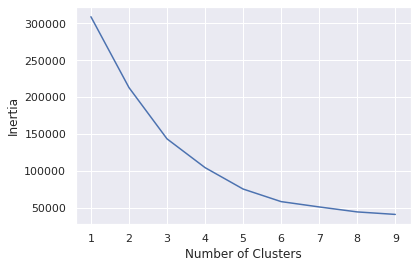

In [ ]:
points = df.iloc[:, 1:5].values
inertias = []
 
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(points)
    inertias.append(kmeans.inertia_)
 
plt.plot(range(1, 10), inertias)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

Segment the customers into five clusters again, and add a column named “Cluster” containing the index of the cluster (0-4) the customer was assigned to the output:

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(points)
df['Cluster'] = kmeans.predict(points)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,19,15,39,0
1,2,1,21,15,81,4
2,3,0,20,16,6,0
3,4,0,23,16,77,4
4,5,0,31,17,40,0


You have a cluster number for each customer, but what does it mean? You can’t plot gender, age, annual income, and spending score in a 2-dimensional chart the way you plotted annual income and spending score in the previous example. But you can compute the median (average) of these values for each cluster and learn more about what the clusters mean. The code below creates a new DataFrame with columns for average age, average income, and so on. Then it shows the results in a table:

In [ ]:
results = pd.DataFrame(columns = ['Cluster', 'Average Age', 'Average Income', 'Average Spending Index', 'Number of Females', 'Number of Males'])
 
for i in range(len(kmeans.cluster_centers_)):
    age = df[df['Cluster'] == i]['Age'].mean()
    income = df[df['Cluster'] == i]['Annual Income (k$)'].mean()
    spend = df[df['Cluster'] == i]['Spending Score (1-100)'].mean()
 
    gdf = df[df['Cluster'] == i]
    females = gdf[gdf['Gender'] == 0].shape[0]
    males = gdf[gdf['Gender'] == 1].shape[0]
     
    results.loc[i] = ([i, age, income, spend, females, males])
 
results.head()

,Cluster,Average Age,Average Income,Average Spending Index,Number of Females,Number of Males
0,0.0,45.217391,26.304348,20.913043,14.0,9.0
1,1.0,32.692308,86.538462,82.128205,21.0,18.0
2,2.0,43.088608,55.291139,49.569620,46.0,33.0
3,3.0,40.666667,87.750000,17.583333,17.0,19.0
4,4.0,25.521739,26.304348,78.565217,14.0,9.0


Here is the output: